In [73]:
import pandas as pd
import numpy as np

In [74]:
raw_meteo_df = pd.read_excel("meteo.xlsx", sheet_name = 1)
raw_hydro_df = pd.read_excel("hydro.xlsx")

In [75]:
# Wstępny preprocessing danych meteo

# Usunięcie nagłówków
meteo_df = raw_meteo_df.drop(0)
# Sparsowanie daty
meteo_df['Unnamed: 0'] = pd.to_datetime(meteo_df['Unnamed: 0'], format='%d-%m-%Y')
meteo_df = meteo_df.set_index("Unnamed: 0").fillna(0.0)
meteo_df = meteo_df.loc[:, (np.arange(len(meteo_df.columns)) + 1) % 2 != 0]
meteo_df.index.rename('date', inplace=True)
# Złączenie danych z dwóch stacji CIESZYN
meteo_df['CIESZYN (249180130)'] = meteo_df['CIESZYN (249180130)'] + meteo_df['CIESZYN (249180550)']
meteo_df = meteo_df.drop('CIESZYN (249180550)', axis=1)
meteo_df

,BARDO ŚLĄSKIE (250160410),BIERUTÓW (251170270),BOLESŁAWÓW (250160610),BOLKÓW (250160030),BORÓW (250160070),BRZEG (250170050),BRZEG DOLNY (251160230),CHWAŁKOWICE (251160170),CIESZYN (249180130),DŁUGOPOLE-ZDRÓJ (250160590),...,SZCZAWNO-ZDRÓJ (250160130),ŚWIERZAWA (251150360),TARNÓW (250160360),TRZEBNICA (251170210),TWARDOCICE (251150280),WALIM (250160270),WROCŁAW-STRACHOWICE (351160424),ZIELENIEC (250160530),ZIELINA (250170280),ŹRÓDŁA (251160370)
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.2,0.5,0.5,0.7,0.2,0.0,0.8,0.8,0.2,2.2,...,0.0,0.6,0.8,0.0,0.5,0.0,0.3,7.0,0.5,0.0
2012-01-02,0.0,1.1,1.0,0.8,0.0,0.3,0.6,1.3,4.0,0.6,...,0.3,0.1,0.0,0.5,2.2,0.1,0.2,1.3,0.0,0.0
2012-01-03,2.2,0.9,5.6,0.0,0.0,0.0,0.1,0.0,0.1,7.5,...,0.0,0.0,0.0,0.1,0.0,0.2,0.1,9.5,0.0,0.0
2012-01-04,2.4,0.1,12.5,0.0,0.0,0.6,0.5,1.5,11.0,18.7,...,1.8,0.2,1.1,1.8,0.2,5.2,0.0,12.6,0.9,0.0
2012-01-05,8.9,7.1,23.0,10.2,0.5,1.0,3.0,6.5,4.3,27.6,...,5.4,10.5,6.6,8.8,9.3,12.9,2.5,46.0,6.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-28,2.4,0.0,2.8,1.2,5.7,3.1,2.8,2.2,1.8,1.5,...,1.7,2.3,0.6,0.0,3.0,0.2,3.5,6.7,4.5,3.8
2021-12-29,0.2,2.3,0.0,0.5,0.7,1.0,0.5,0.7,0.0,0.0,...,0.0,0.1,0.1,0.0,0.8,0.0,1.3,3.2,1.1,0.9


In [76]:
# Wstępny preprocessing danych hydro

# Usunięcie nagłówków
hydro_df = raw_hydro_df.drop(0).drop(1)
# Sparsowanie daty
hydro_df['Unnamed: 0'] = pd.to_datetime(hydro_df['Unnamed: 0'], format='%Y-%m-%d')
hydro_df = hydro_df.set_index("Unnamed: 0")
hydro_df = hydro_df.rename(columns={'Unnamed: 1': 'result'})
hydro_df = hydro_df.drop('Unnamed: 2', axis=1)
hydro_df.index.rename('date', inplace=True)
hydro_df['result'] = hydro_df['result'].astype(float)
hydro_df

,result
date,
2011-11-01,199.0
2011-11-02,200.0
2011-11-03,194.0
2011-11-04,195.0
2011-11-05,192.0
...,...
2021-10-27,225.0
2021-10-28,224.0
2021-10-29,214.0


In [77]:
df = meteo_df.merge(hydro_df, left_index=True, right_index=True)
df

,BARDO ŚLĄSKIE (250160410),BIERUTÓW (251170270),BOLESŁAWÓW (250160610),BOLKÓW (250160030),BORÓW (250160070),BRZEG (250170050),BRZEG DOLNY (251160230),CHWAŁKOWICE (251160170),CIESZYN (249180130),DŁUGOPOLE-ZDRÓJ (250160590),...,ŚWIERZAWA (251150360),TARNÓW (250160360),TRZEBNICA (251170210),TWARDOCICE (251150280),WALIM (250160270),WROCŁAW-STRACHOWICE (351160424),ZIELENIEC (250160530),ZIELINA (250170280),ŹRÓDŁA (251160370),result
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.2,0.5,0.5,0.7,0.2,0.0,0.8,0.8,0.2,2.2,...,0.6,0.8,0.0,0.5,0.0,0.3,7.0,0.5,0.0,199.0
2012-01-02,0.0,1.1,1.0,0.8,0.0,0.3,0.6,1.3,4.0,0.6,...,0.1,0.0,0.5,2.2,0.1,0.2,1.3,0.0,0.0,197.0
2012-01-03,2.2,0.9,5.6,0.0,0.0,0.0,0.1,0.0,0.1,7.5,...,0.0,0.0,0.1,0.0,0.2,0.1,9.5,0.0,0.0,197.0
2012-01-04,2.4,0.1,12.5,0.0,0.0,0.6,0.5,1.5,11.0,18.7,...,0.2,1.1,1.8,0.2,5.2,0.0,12.6,0.9,0.0,204.0
2012-01-05,8.9,7.1,23.0,10.2,0.5,1.0,3.0,6.5,4.3,27.6,...,10.5,6.6,8.8,9.3,12.9,2.5,46.0,6.1,0.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0
2021-10-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.0
2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0


In [78]:
from scipy import signal, fftpack
import pandas as pd
import numpy

In [79]:
# Korelacja każdy-z-każdym
corr = df.corr()
corr

,BARDO ŚLĄSKIE (250160410),BIERUTÓW (251170270),BOLESŁAWÓW (250160610),BOLKÓW (250160030),BORÓW (250160070),BRZEG (250170050),BRZEG DOLNY (251160230),CHWAŁKOWICE (251160170),CIESZYN (249180130),DŁUGOPOLE-ZDRÓJ (250160590),...,ŚWIERZAWA (251150360),TARNÓW (250160360),TRZEBNICA (251170210),TWARDOCICE (251150280),WALIM (250160270),WROCŁAW-STRACHOWICE (351160424),ZIELENIEC (250160530),ZIELINA (250170280),ŹRÓDŁA (251160370),result
BARDO ŚLĄSKIE (250160410),1.000000,0.640446,0.711728,0.666142,0.720564,0.577840,0.547365,0.569034,0.413432,0.717323,...,0.597625,0.896545,0.466933,0.561013,0.733690,0.668345,0.653349,0.545816,0.403366,-0.032908
BIERUTÓW (251170270),0.640446,1.000000,0.581702,0.649948,0.703129,0.579403,0.547900,0.700212,0.415288,0.588765,...,0.600794,0.642075,0.602147,0.599584,0.623109,0.749558,0.607014,0.485359,0.405198,-0.062499
BOLESŁAWÓW (250160610),0.711728,0.581702,1.000000,0.586065,0.639163,0.529441,0.486223,0.518084,0.459763,0.809784,...,0.535703,0.699391,0.423547,0.469946,0.666612,0.594647,0.681706,0.562387,0.353732,-0.033995
BOLKÓW (250160030),0.666142,0.649948,0.586065,1.000000,0.633124,0.515641,0.569712,0.715319,0.362512,0.586074,...,0.826145,0.689611,0.542192,0.797165,0.764954,0.701826,0.604923,0.465081,0.393940,-0.029811
BORÓW (250160070),0.720564,0.703129,0.639163,0.633124,1.000000,0.583360,0.559943,0.667912,0.379916,0.630472,...,0.589165,0.729808,0.509325,0.533250,0.694568,0.766373,0.597499,0.531254,0.425935,-0.032691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WROCŁAW-STRACHOWICE (351160424),0.668345,0.749558,0.594647,0.701826,0.766373,0.583635,0.646047,0.745957,0.344230,0.622820,...,0.649374,0.699334,0.585222,0.622869,0.670259,1.000000,0.600566,0.503942,0.512238,-0.040602
ZIELENIEC (250160530),0.653349,0.607014,0.681706,0.604923,0.597499,0.476483,0.454204,0.550400,0.374023,0.761070,...,0.523790,0.638288,0.436972,0.517469,0.621774,0.600566,1.000000,0.448264,0.359385,-0.021423
ZIELINA (250170280),0.545816,0.485359,0.562387,0.465081,0.531254,0.741497,0.605053,0.387367,0.396694,0.538054,...,0.450508,0.518722,0.236024,0.405492,0.490516,0.503942,0.448264,1.000000,0.415809,0.045203
ŹRÓDŁA (251160370),0.403366,0.405198,0.353732,0.393940,0.425935,0.490225,0.550172,0.382106,0.196997,0.410982,...,0.411201,0.415943,-0.052046,0.357494,0.375486,0.512238,0.359385,0.415809,1.000000,-0.002125


In [80]:
# Cross-korelacja względem danych przesuniętych o n-dni
def cross_corr(x, y, lag=0):
    return x.corr(y.shift(lag))

def shift_Factor(x,y,R):
    x_corr = [cross_corr(x, y, lag=i) for i in range(R)]
    
    # R factor is the number of the shifts who should be checked by the function
    Kot = pd.DataFrame(list(x_corr)).reset_index()
    Kot.rename(columns={0:'Corr', 'index':'Shift_num'}, inplace=True)
    
    # We find optimal correlation shift
    Kot['abs'] = Kot['Corr'].abs()
    SF = Kot.loc[Kot['abs']==Kot['abs'].max(), 'Shift_num']
    p1 = SF.to_frame()
    SF = p1.Shift_num.max()
    
    return SF

In [81]:
# Minimalna wartość sumy opadów - stacje które zarejestrowały mniej opadów w całym okresie pomiarów zostają odsiane
MIN_RAIN_THRESHOLD = meteo_df.sum().sort_values().quantile(0.25)

In [82]:
y = df['result']    # dependent variable
R = 20  
filtered = meteo_df.sum().loc[lambda x : x > MIN_RAIN_THRESHOLD]

# Przeliczenie przesunięcia czasowego z największą korelacją dla każdej ze stacji
for col_name in filtered.index.values:
  x = df[col_name]       # independent variable
  x = x.ewm(span=4).mean()
  SKO = shift_Factor(y, x, R)
  print('Optimal shift for {}: {}, correlation: {}'.format(col_name, SKO, cross_corr(y, x, lag=SKO)))



Optimal shift for BARDO ŚLĄSKIE (250160410): 4, correlation: 0.20075168964765103
Optimal shift for BIERUTÓW (251170270): 5, correlation: 0.16374840574757848
Optimal shift for BOLESŁAWÓW (250160610): 4, correlation: 0.2271706684093963
Optimal shift for BOLKÓW (250160030): 5, correlation: 0.22186025673106133
Optimal shift for BORÓW (250160070): 5, correlation: 0.20465571476969707
Optimal shift for CHWAŁKOWICE (251160170): 5, correlation: 0.17107510863681327
Optimal shift for CIESZYN (249180130): 4, correlation: 0.28756468139815555
Optimal shift for DŁUGOPOLE-ZDRÓJ (250160590): 5, correlation: 0.20828698184434727
Optimal shift for DZIERŻONIÓW (250160260): 4, correlation: 0.20950190140968394
Optimal shift for DZIEWIĘTLICE (250170290): 4, correlation: 0.22022604262840714
Optimal shift for GŁUBCZYCE (250170390): 4, correlation: 0.2633756675402955
Optimal shift for GŁUCHOŁAZY (250170330): 4, correlation: 0.30386183977895115
Optimal shift for GRABOWNICA (251170150): 5, correlation: 0.215104206

In [83]:
filtered_df = df[np.append(filtered.index.values, ['result'])]
filtered_df

,BARDO ŚLĄSKIE (250160410),BIERUTÓW (251170270),BOLESŁAWÓW (250160610),BOLKÓW (250160030),BORÓW (250160070),CHWAŁKOWICE (251160170),CIESZYN (249180130),DŁUGOPOLE-ZDRÓJ (250160590),DZIERŻONIÓW (250160260),DZIEWIĘTLICE (250170290),...,SZALEJÓW GÓRNY (250160840),SZCZAWNO-ZDRÓJ (250160130),ŚWIERZAWA (251150360),TARNÓW (250160360),TRZEBNICA (251170210),TWARDOCICE (251150280),WALIM (250160270),WROCŁAW-STRACHOWICE (351160424),ZIELENIEC (250160530),result
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.2,0.5,0.5,0.7,0.2,0.8,0.2,2.2,0.0,0.6,...,0.0,0.0,0.6,0.8,0.0,0.5,0.0,0.3,7.0,199.0
2012-01-02,0.0,1.1,1.0,0.8,0.0,1.3,4.0,0.6,0.0,0.0,...,0.0,0.3,0.1,0.0,0.5,2.2,0.1,0.2,1.3,197.0
2012-01-03,2.2,0.9,5.6,0.0,0.0,0.0,0.1,7.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.2,0.1,9.5,197.0
2012-01-04,2.4,0.1,12.5,0.0,0.0,1.5,11.0,18.7,1.5,1.3,...,0.0,1.8,0.2,1.1,1.8,0.2,5.2,0.0,12.6,204.0
2012-01-05,8.9,7.1,23.0,10.2,0.5,6.5,4.3,27.6,1.0,2.7,...,0.0,5.4,10.5,6.6,8.8,9.3,12.9,2.5,46.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0
2021-10-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.0
2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0


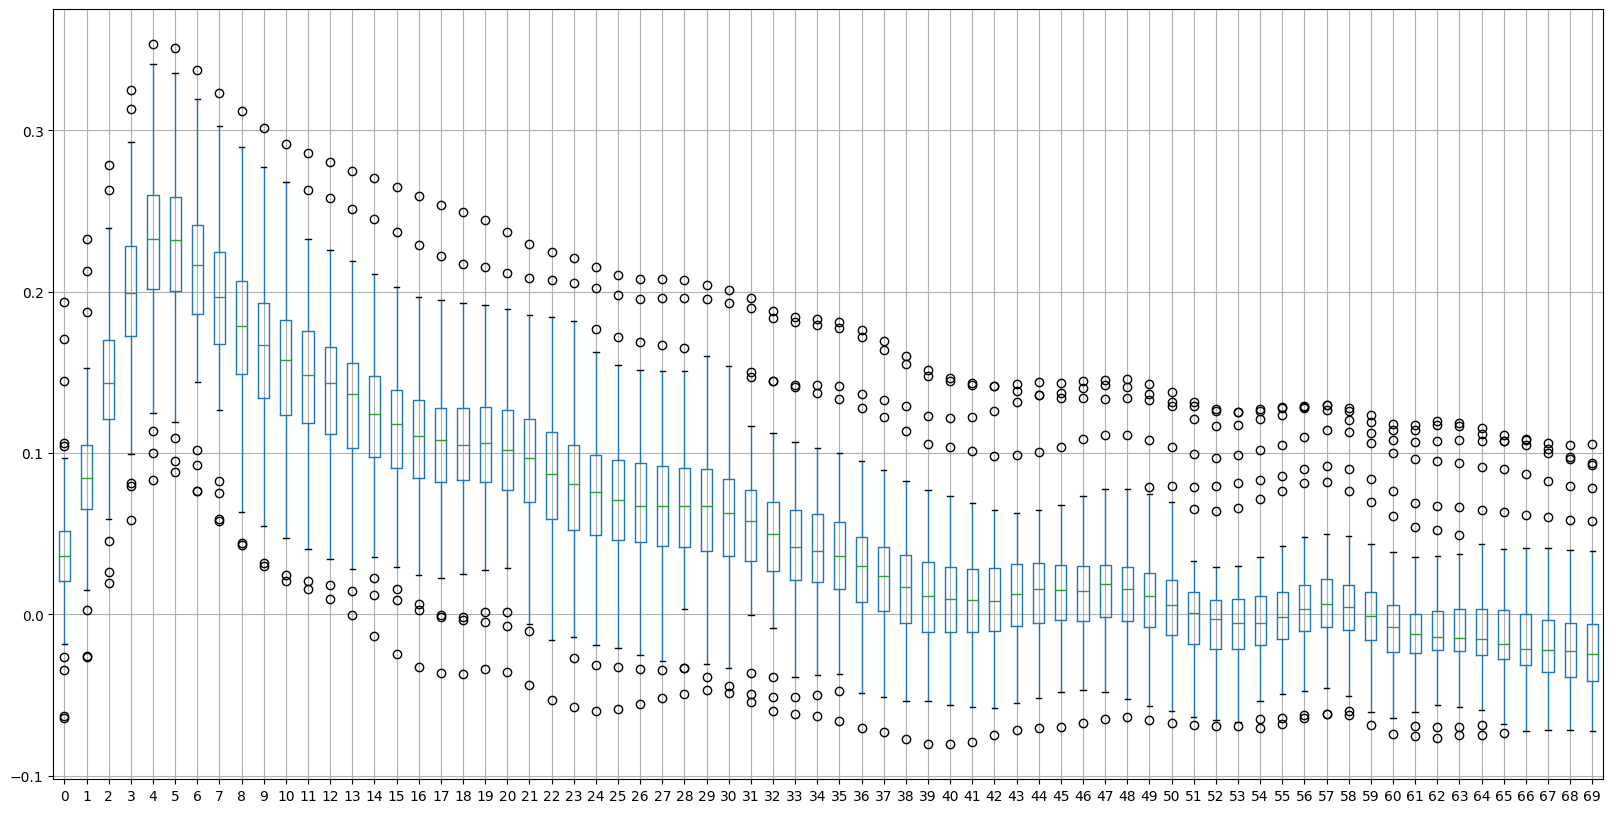

In [84]:
y = df['result']    # dependent variable
R = 70

# Wykres korelacji dla różnych przesunięć (mediana, 0.25 percentyl, 0.75 percentyl, outsiderzy)

import matplotlib.pyplot as plt

corr_df = pd.DataFrame()
for col in filtered_df.columns:
   if (col != 'result'):
      x = df[col].ewm(span=5).mean()
      corr_df[col] = [cross_corr(y, x, lag=i) for i in range(R)]

corr_df.T.boxplot(figsize=(20, 10))
plt.show()

# LSTM


In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
pd.options.mode.chained_assignment = None

In [86]:
# Średnie opady z klastrów stacji pomiarowych - klastry wyliczone w osobnym notebooku

clusters = pd.read_csv("clusters.csv")
clusters['Date'] = pd.to_datetime(clusters['Date'], format='%d-%m-%Y')
clusters = clusters.set_index("Date")
clusters

,0,1,2,3,4,5,6
Date,,,,,,,
2012-01-01,0.500,0.481818,0.373333,0.977778,0.754167,0.350000,0.22
2012-01-02,3.600,0.736364,0.153333,0.544444,0.370833,0.775000,0.81
2012-01-03,0.200,0.045455,0.046667,1.244444,2.579167,0.100000,0.81
2012-01-04,9.600,0.554545,0.720000,2.033333,6.804167,0.700000,2.26
2012-01-05,11.850,4.081818,3.960000,9.866667,17.691667,7.625000,4.46
...,...,...,...,...,...,...,...
2021-12-27,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2021-12-28,0.900,2.900000,2.653333,1.400000,1.433333,2.533333,1.50
2021-12-29,0.025,0.690909,0.500000,1.444444,0.191667,0.391667,0.30


In [87]:
features_df = filtered_df.loc[:, filtered_df.columns != 'result']
sum_series = features_df.T.sum()

# Wzbogacenie danych o sinus oraz cosinus liczbowych reprezentacji miesiąca
sin_series = np.sin(2 * np.pi * features_df.index.month.values / 12.0)
cos_series = np.cos(2 * np.pi * features_df.index.month.values / 12.0)
target_series = filtered_df.loc[:, 'result']

target = ['result']
features = ['sum', 'sin', 'cos', '0', '1', '2', '3', '4', '5', '6']

features_df = sum_series.to_frame('sum').join(target_series)
features_df['sin'] = sin_series
features_df['cos'] = cos_series
features_df = features_df.merge(clusters, how='left', left_index=True, right_index=True)
features_df


,sum,result,sin,cos,0,1,2,3,4,5,6
date,,,,,,,,,,,
2012-01-01,41.9,199.0,0.500000,0.866025,0.50,0.481818,0.373333,0.977778,0.754167,0.350,0.22
2012-01-02,46.9,197.0,0.500000,0.866025,3.60,0.736364,0.153333,0.544444,0.370833,0.775,0.81
2012-01-03,78.4,197.0,0.500000,0.866025,0.20,0.045455,0.046667,1.244444,2.579167,0.100,0.81
2012-01-04,241.0,204.0,0.500000,0.866025,9.60,0.554545,0.720000,2.033333,6.804167,0.700,2.26
2012-01-05,709.1,205.0,0.500000,0.866025,11.85,4.081818,3.960000,9.866667,17.691667,7.625,4.46
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.0,225.0,-0.866025,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.00
2021-10-28,0.0,224.0,-0.866025,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.00
2021-10-29,0.0,214.0,-0.866025,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.00


In [88]:
lstm_data = features_df

# Podział na dane treningowe i testowe
split = int(lstm_data.shape[0] * 2/3)
df_train = lstm_data.iloc[:split, :].copy()
df_test = lstm_data.iloc[split:, :].copy()

# Normalizacja danych
target_scaler = MinMaxScaler().fit(df_train[target])
df_train[target] = target_scaler.transform(df_train[target])
df_test[target] = target_scaler.transform(df_test[target])

features_scaler = MinMaxScaler().fit(df_train[features])
df_train[features] = features_scaler.transform(df_train[features])
df_test[features] = features_scaler.transform(df_test[features])

In [89]:
# Przedział czasowy dla sieci LSTM
sequence_length = 10
X_train, y_train = [], []

for i in range(sequence_length, df_train.shape[0]):
    X_train.append(df_train[features + target].iloc[i - sequence_length: i])
    y_train.append(df_train[target].iloc[i])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []

for i in range(sequence_length, df_test.shape[0]):
    X_test.append(df_test[features + target].iloc[i - sequence_length: i])
    y_test.append(df_test[target].iloc[i])

X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape)
print(X_test.shape)


(2384, 10, 11)
(1188, 10, 11)


In [90]:
# Model sieci neuronowej
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Uczenie modelu na danych treningowych
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=120, batch_size=32)

Epoch 1/120
75/75 [==============================] - 11s 18ms/step - loss: 0.0261
Epoch 2/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0097
Epoch 3/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0078
Epoch 4/120
75/75 [==============================] - 1s 18ms/step - loss: 0.0067
Epoch 5/120
75/75 [==============================] - 1s 18ms/step - loss: 0.0057
Epoch 6/120
75/75 [==============================] - 1s 18ms/step - loss: 0.0052
Epoch 7/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 8/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0045
Epoch 9/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0044
Epoch 10/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0040
Epoch 11/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0041
Epoch 12/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0043
Epoch 13/120
75/75 [====

In [91]:
# Ewaluacja na danych treningowych
model.fit(X_train, y_train, epochs=120, batch_size=32)

model.evaluate(X_test, y_test)

Epoch 1/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 2/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 3/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 4/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 5/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 6/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 7/120
75/75 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 8/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 9/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 10/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 11/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 12/120
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 13/120
75/75 [=====

0.001600607531145215

38/38 [==============================] - 2s 5ms/step


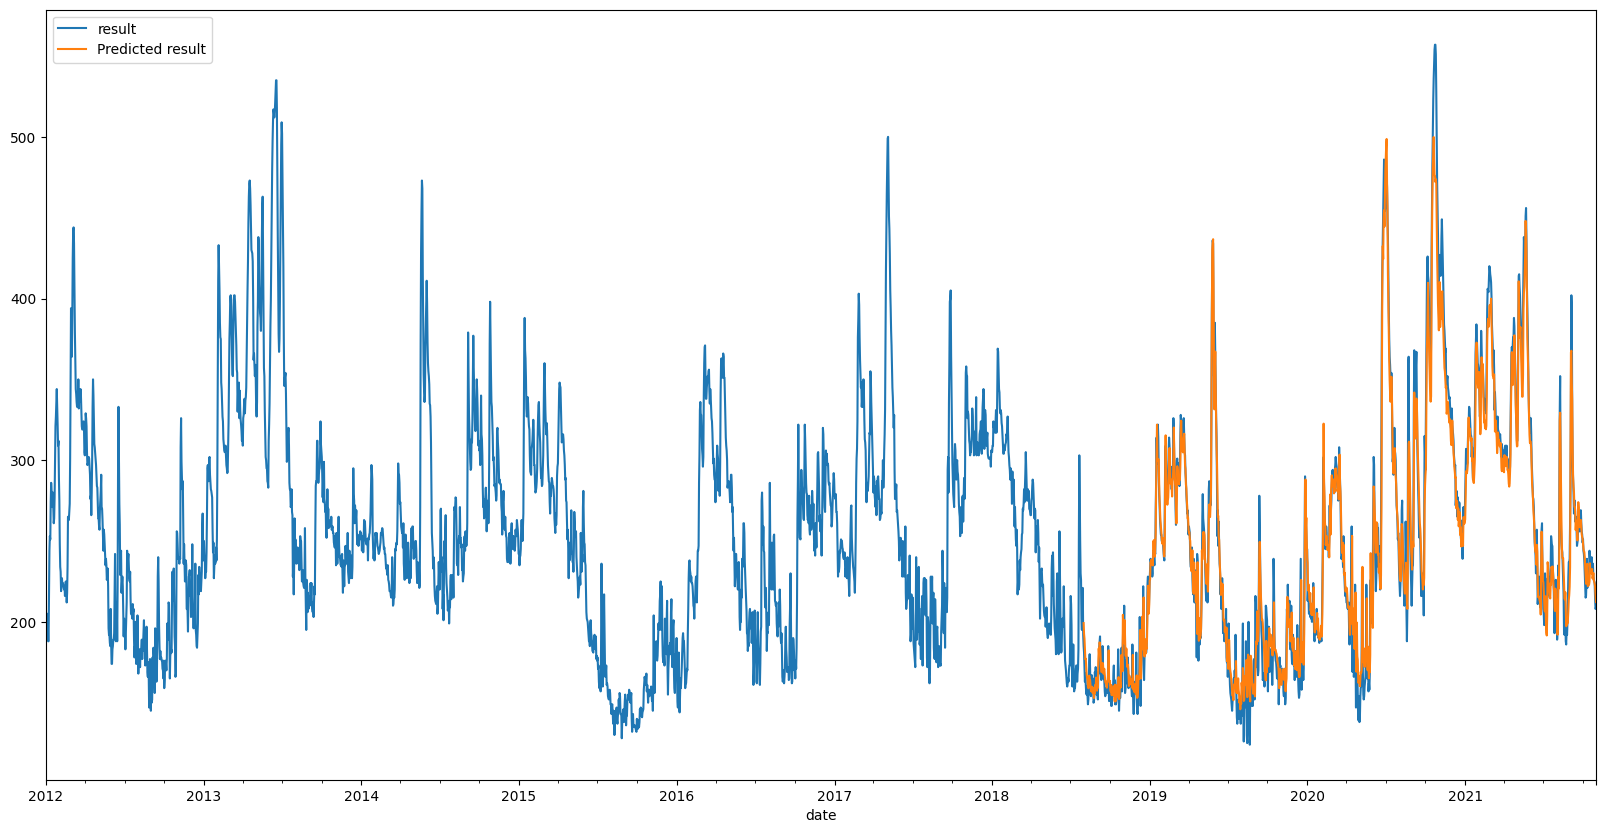

In [92]:
# Wykres predukcji dla horyzontu 1-dniowego
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred)

df['Predicted result'] = np.nan
df['Predicted result'].iloc[- y_pred.shape[0]:] = y_pred.flatten()
df[['result', 'Predicted result']].plot(figsize=(20, 10))
plt.show()

In [93]:
# Predykcje dla horyzontów 7-dniowych

n_future = 7

def prepare_for_iteration(f, y_pred):
  X_iter = []

  # Iteracyjnie powtarzamy predykcję 7-razy, za każdym razem dodając predykcję z poprzedniego kroku do danych wejściowych do następnego kroku

  for i in range(sequence_length, df_test.shape[0] - n_future):
    X_i = df_test[features + target].iloc[i - sequence_length + f: i]
    features_diff = df_test[features].iloc[i: i + f]
    target_diff = y_pred[i - sequence_length]
    diff = np.column_stack((features_diff, target_diff))

    X_iter.append(np.append(X_i, diff, axis=0))

  return np.array(X_iter)


y_pred = np.empty((df_test.shape[0] - sequence_length - n_future, 0))
for f in range(n_future):
  x_f = prepare_for_iteration(f, y_pred)
  y_f = model.predict(x_f)
  
  y_pred = np.column_stack((y_pred, y_f))

# Denormalizacja danych
y_pred = target_scaler.inverse_transform(y_pred)

37/37 [==============================] - 0s 5ms/step


In [94]:
# Dane rzeczywiste
actual = lstm_data.iloc[split:, :].copy()
actual = actual.iloc[sequence_length + n_future - 1:actual.shape[0] - n_future - 1, 1]
actual

date
2018-08-07    156.0
2018-08-08    155.0
2018-08-09    160.0
2018-08-10    154.0
2018-08-11    149.0
              ...  
2021-10-19    239.0
2021-10-20    236.0
2021-10-21    240.0
2021-10-22    230.0
2021-10-23    231.0
Name: result, Length: 1174, dtype: float64

In [95]:
# Wyniki predykcji dla horyzontów od 1 do 7 dniowych

res = pd.DataFrame(actual)
for i in range(n_future):
  res["predicted {} days ago".format(i + 1)] = y_pred[n_future - i:y_pred.shape[0] - i, i]
res

,result,predicted 1 days ago,predicted 2 days ago,predicted 3 days ago,predicted 4 days ago,predicted 5 days ago,predicted 6 days ago,predicted 7 days ago
date,,,,,,,,
2018-08-07,156.0,167.556824,173.492818,173.327183,173.368641,176.040823,179.362141,181.520417
2018-08-08,155.0,165.480707,170.295585,169.546488,169.619617,170.808761,174.691859,177.750039
2018-08-09,160.0,164.588130,166.731348,165.684162,165.604986,167.715000,169.449543,172.836943
2018-08-10,154.0,159.802109,163.437449,162.920057,162.772246,165.065391,168.118143,169.581288
2018-08-11,149.0,158.899847,162.929979,161.950324,161.884430,163.593501,166.407890,168.919245
...,...,...,...,...,...,...,...,...
2021-10-19,239.0,231.991140,227.775474,225.459683,224.737999,219.404080,218.343509,216.863474
2021-10-20,236.0,229.958507,227.682895,225.523945,223.471881,222.770987,217.201919,216.094898
2021-10-21,240.0,232.662316,226.880004,225.725490,223.825299,221.766564,221.024587,215.281672


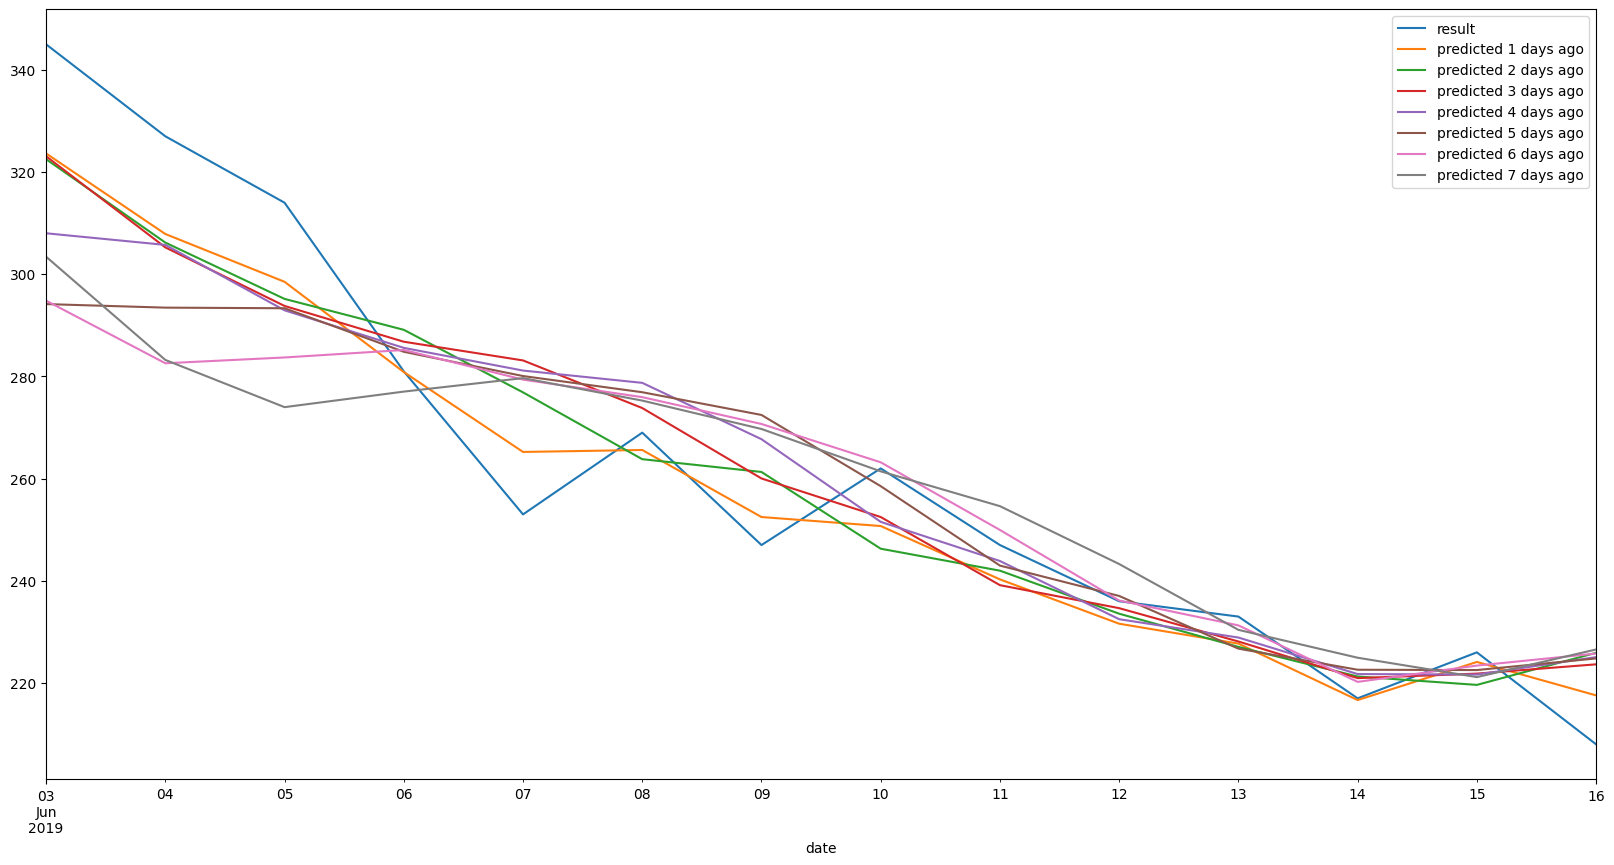

In [96]:
# Fragment wykresu porównującego predykcje z wartością rzeczywistą

res.iloc[300: 314].plot(figsize=(20, 10))
plt.show()

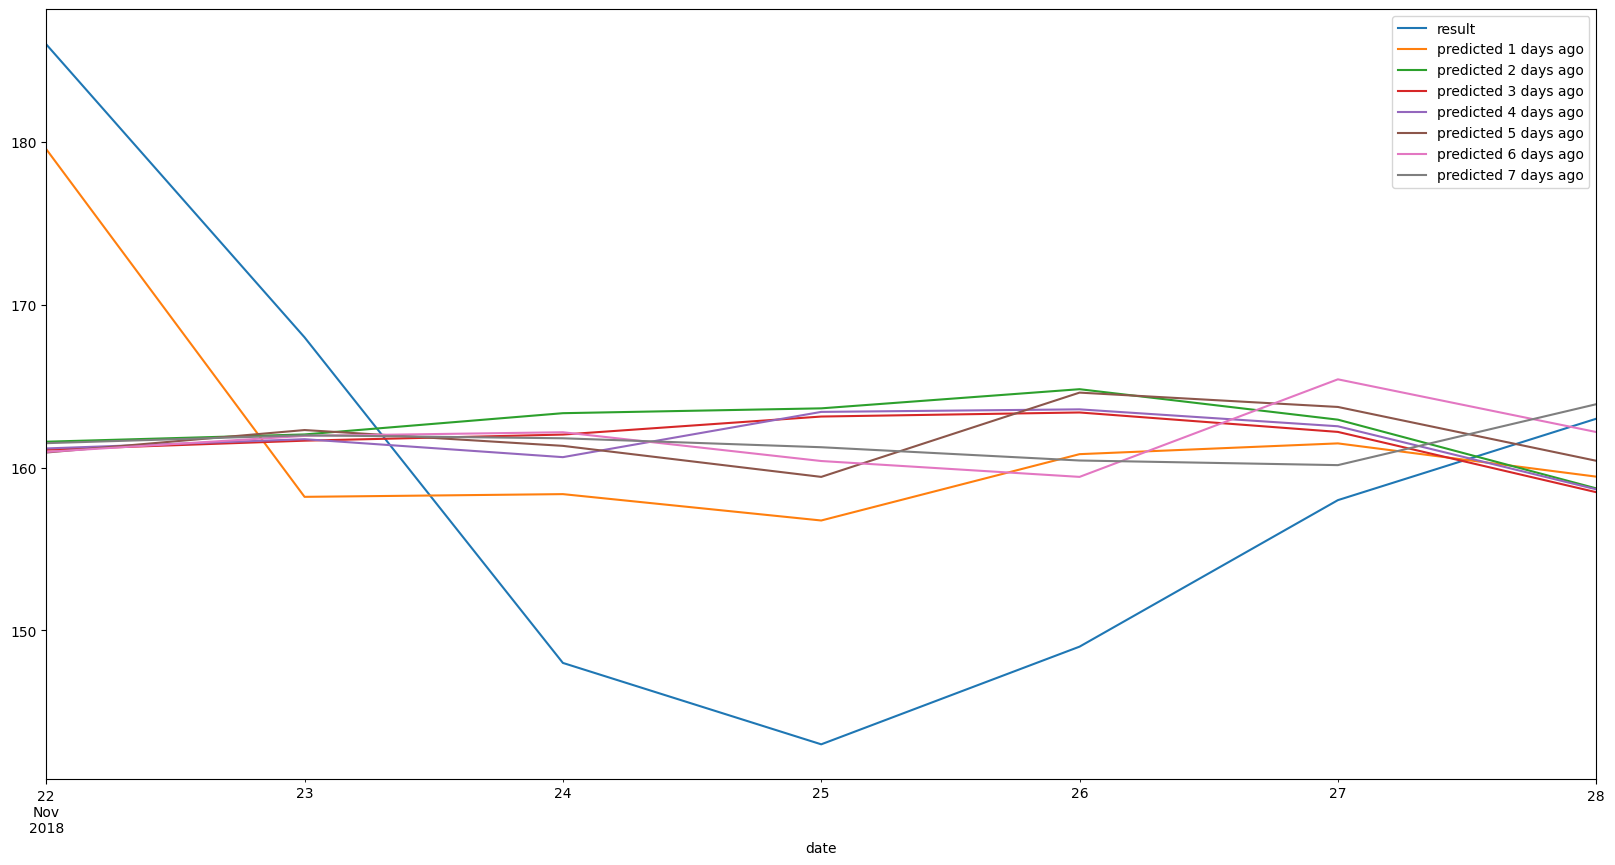

In [97]:
res.iloc[107: 114].plot(figsize=(20, 10))
plt.show()

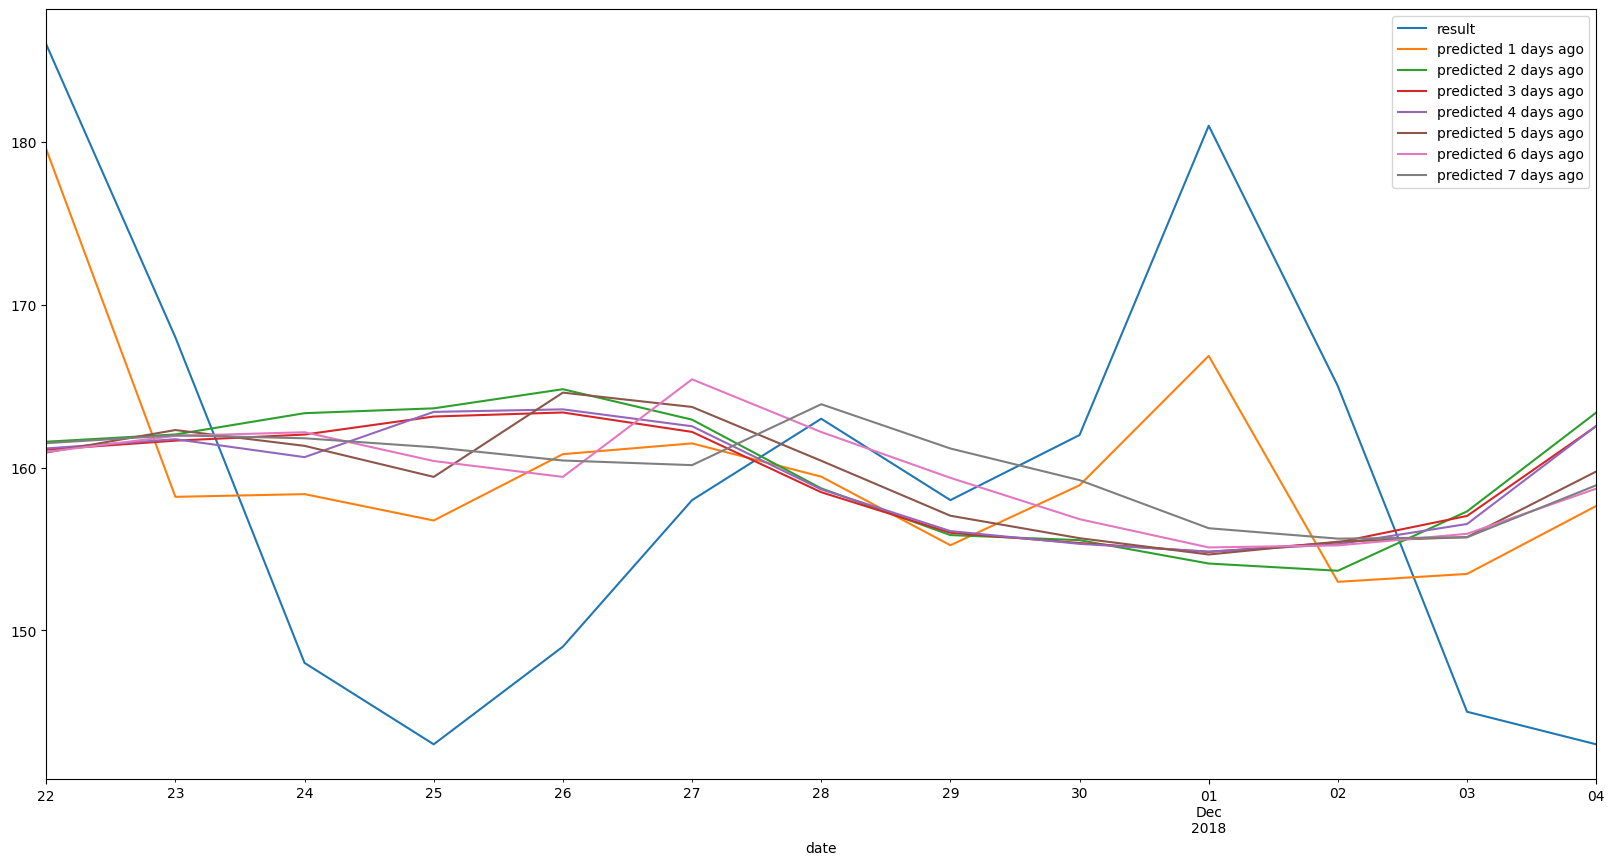

In [98]:
res.iloc[107: 120].plot(figsize=(20, 10))
plt.show()

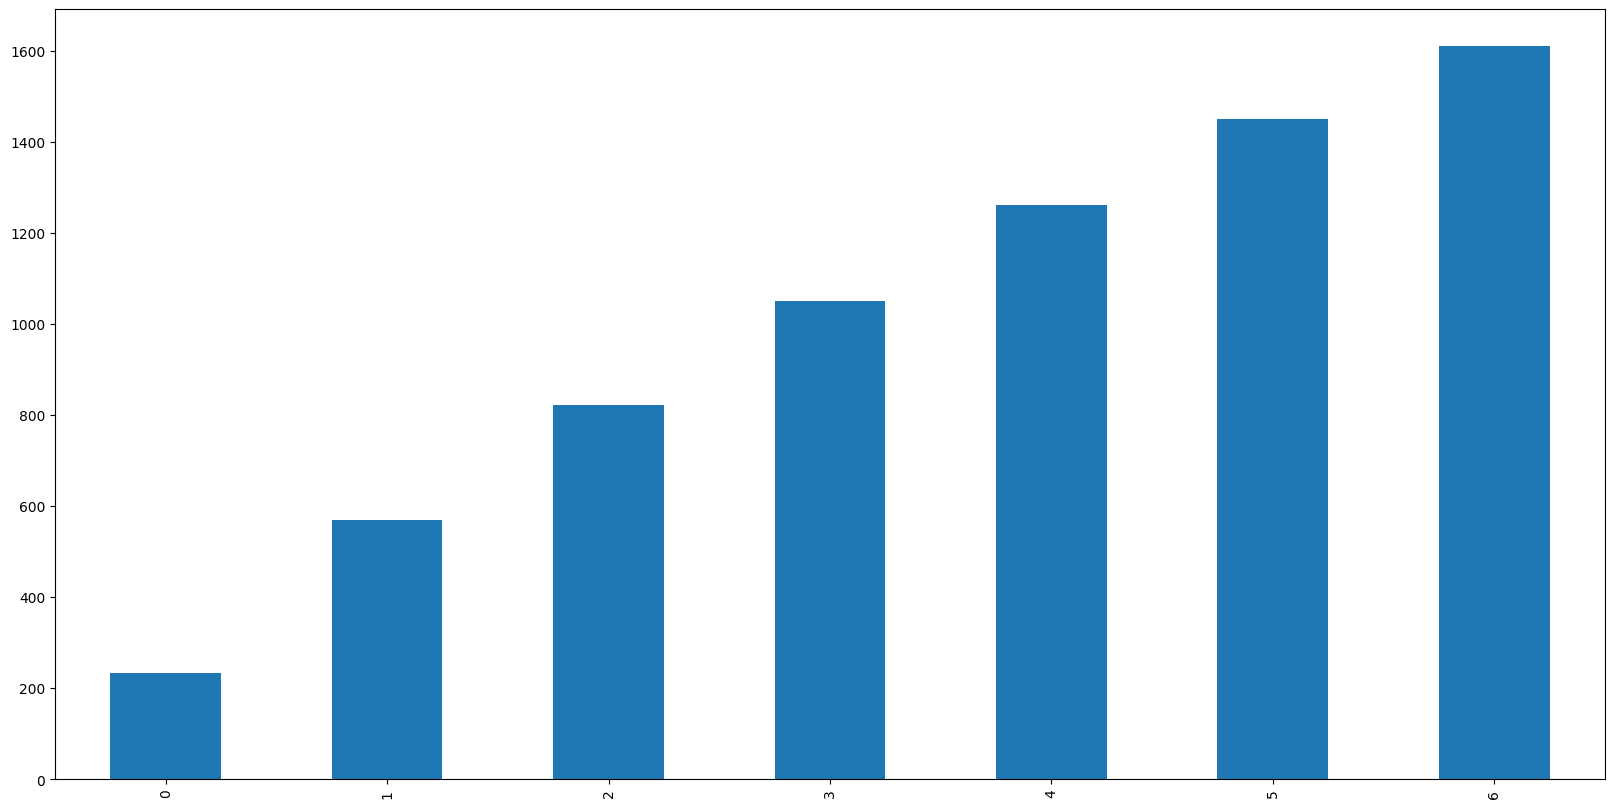

In [99]:
errors = []
import joblib

# Błąd średniokwadratowy

for i in range(n_future):
    mean_error = np.sum(np.power(res.iloc[:, (i + 1)] - res.iloc[:, 0], 2.0)) / res.shape[0]
    errors.append(mean_error)

joblib.dump(errors, 'errors.gz')
pd.Series(errors).plot.bar(figsize=(20, 10))
plt.show()

In [100]:
!pip freeze

absl-py==1.4.0
anyio==3.6.2
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
astunparse==1.6.3
attrs==22.2.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==6.0.0
cachetools==5.3.0
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==3.0.1
click==8.1.3
comm==0.1.2
contourpy==1.0.7
cycler==0.11.0
debugpy==1.6.6
decorator==5.1.1
defusedxml==0.7.1
et-xmlfile==1.1.0
executing==1.2.0
fastjsonschema==2.16.2
Flask==2.1.0
Flask-Cors==3.0.10
flatbuffers==23.1.21
fonttools==4.38.0
fqdn==1.5.1
gast==0.4.0
google-auth==2.16.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.51.1
h5py==3.8.0
idna==3.4
importlib-metadata==6.0.0
ipykernel==6.20.2
ipython==8.9.0
ipython-genutils==0.2.0
ipywidgets==8.0.4
isoduration==20.11.0
itsdangerous==2.1.2
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
jsonpointer==2.3
jsonschema==4.17.3
jupyter==1.0.0
jupyter-console==6.4.4
jupyter-events==0.6.3
jupyter_client==8.0.1
jupyter_core==5.1.5
jupyter_server==2.1.0
jupyter_s